<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/2017_kaggle_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
%config inLineBackend.figure_format = 'retina' 
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from pywaffle import Waffle
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec

In [360]:
#@title
!pip install pywaffle

In [361]:
#@title
!pip install plotly.express

  Using cached https://files.pythonhosted.org/packages/d4/d6/8a2906f51e073a4be80cab35cfa10e7a34853e60f3ed5304ac470852a08d/plotly_express-0.4.1-py2.py3-none-any.whl


In [362]:
#@title
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


#  **Kaggle ver 2017**


--------------------------------------------------------------------------------
Kaggle에서 실시한 Survey로 만든 데이터셋이다.


모델링과 성능평가는 할수 없지만, 클리닝(Cleaning)과 시각화(visualization)을 시도한다.



1.   데이터 탑재
2.   데이터 형태 확인
3.   데이터 결측치와 이상값(Outlier)를 확인하고 처리
4.   데이터 시각화(visualization)

**데이터의 columns 들이 question이다. rows들이 개개인 답변**


In [363]:
data = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/kaggle survey/2017/multipleChoiceResponses.csv', encoding='ISO-8859-1')

In [364]:
#@title
data.shape

(16716, 228)

In [358]:
#@title
data.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

데이터의 칼럼(columns) 수는 228개,

데이터의 행(rows)==(참여수)은 16716개

columns(Question)을 살펴보면 본인의 정보를 나타내는 col은 data[:,:3]이다.

**개인정보를 이용해 분포가 어떻게 되는지 시각화까지 해보겠다.**

In [365]:
data_copy = data.copy()

In [ ]:
#@title
data_copy['GenderSelect'] = data_copy['GenderSelect'].apply(lambda x: 'ETC' if x not in ['Male', 'Female'] else x)
## male,female외에 'ETC'로 바꾸다

In [ ]:
#@title
data_gender = data_copy['GenderSelect'].value_counts()

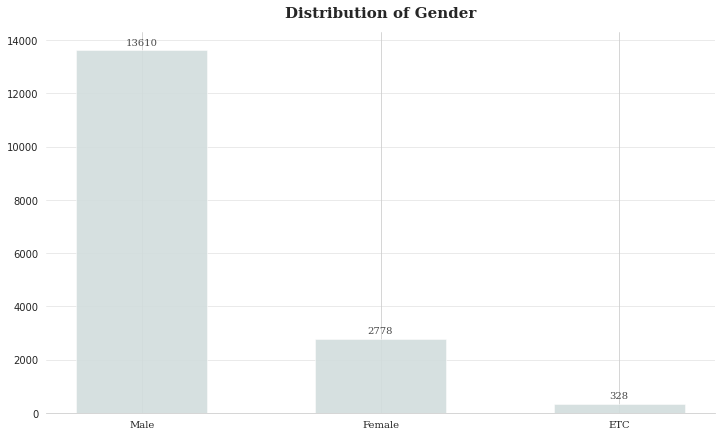

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(data_gender.index, data_gender, color='#d2dddd', width=.55, linewidth=.55, alpha=.9)

for i in data_gender.index:
  ax.annotate(data_gender[i], xy=(i, data_gender[i] + 300), va='center', ha='center', color='#4a4a4a', fontfamily='serif')

for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data_gender.index, fontsize=10, fontfamily='serif')
ax.set_title('Distribution of Gender', fontsize=15, pad=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.5)

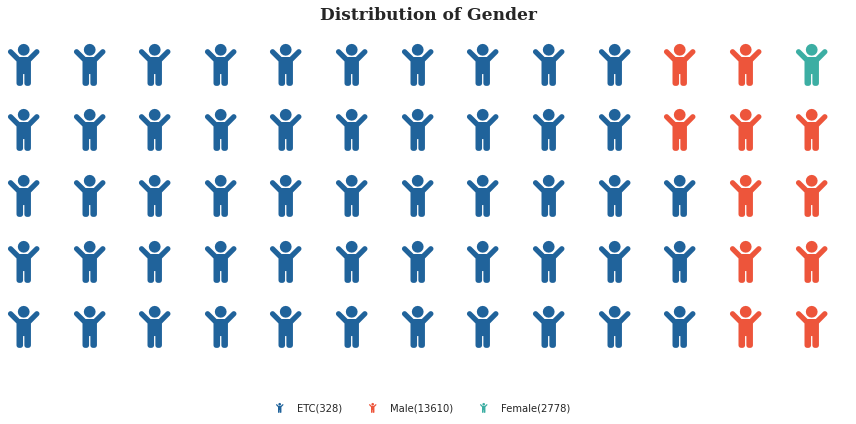

In [366]:
#@title
fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,
    columns = 13,
    values = data_gender,
    icons='child',
    colors = ('#20639B', '#ED553B', '#3CAEA3'),
    title={'label':'Distribution of Gender', 'loc':'center', 'fontsize':17, 'fontweight':'bold', 'fontfamily':'serif'},
    labels={f'{a}({b})' for a,b in zip(data_gender.index, data_gender)},
    legend={'loc':'lower left', 'bbox_to_anchor':(.3,-0.25), 'ncol':len(data_gender.index), 'framealpha':0},
    figsize=(12,6),
    icon_legend = True
)
## Waffle로 만든 남녀 비율 시각화

Text(0.5, 1.0, 'Country distibution of gender')

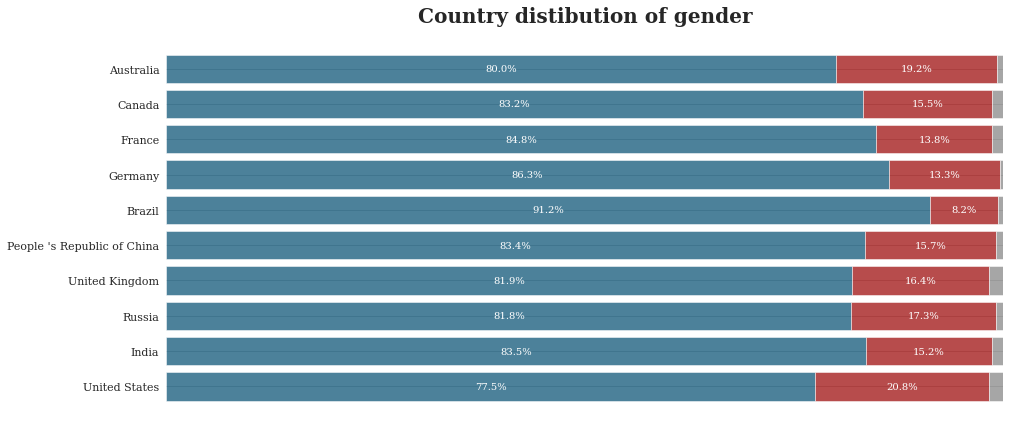

In [ ]:
#@title
countrytop10 = data_copy['Country'].value_counts()[:11].drop(['Other'], axis=0).index
data_c_g = data_copy.groupby('Country')['GenderSelect'].value_counts(normalize=True).unstack().loc[countrytop10]
## 나라와 성별을 그룹바이 한 변수 <== data_c_g

fig, ax = plt.subplots(figsize=(15,7))
ax.barh(data_c_g.index, data_c_g['Male'], color='#004c70', linewidth=.7, alpha=.7)
ax.barh(data_c_g.index, data_c_g['Female'], color='#990000', linewidth=.7, left=data_c_g['Male'], alpha=.7)
ax.barh(data_c_g.index, data_c_g['ETC'], color='gray', linewidth=.7, left=data_c_g['Male'] + data_c_g['Female'], alpha=.7)

ax.set_xlim(0,1)
ax.set_xticks([])

for i in data_c_g['Male'].index:
  ax.annotate(f"{round(data_c_g['Male'][i]*100, 1)}%", xy=(data_c_g['Male'][i]/2, i), ha='center', va='center', color='w', fontweight='light', fontfamily='serif')
for i in data_c_g['Female'].index:
  ax.annotate(f"{round(data_c_g['Female'][i]*100, 1)}%", xy=(data_c_g['Male'][i] + data_c_g['Female'][i]/2, i), ha='center', va='center', color='w', fontweight='light', fontfamily='serif')

for s in ['top', 'left', 'right', 'bottom']:
  ax.spines[s].set_visible(False)

ax.set_yticklabels(data_c_g.index, fontfamily='serif', fontsize=11)
ax.set_title('Country distibution of gender', fontsize=20, pad=15, fontweight='bold', fontfamily='serif')

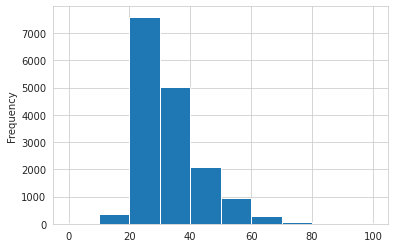

In [ ]:
data_copy.Age.plot.hist()
## 대부분 20~60세이다
## 나이 카테고리를 만들건데 10-20,20-30,...식으로 만들겠다.

In [ ]:
#@title
agelabel = ['teen', "20's", "30's", "40's", "50's", "60's>"] ## 카테고리를 string으로 바꿀수있다.
data_copy['Age_cut'] = pd.cut(data_copy.Age, bins=np.linspace(10,70, num=7), labels=agelabel)

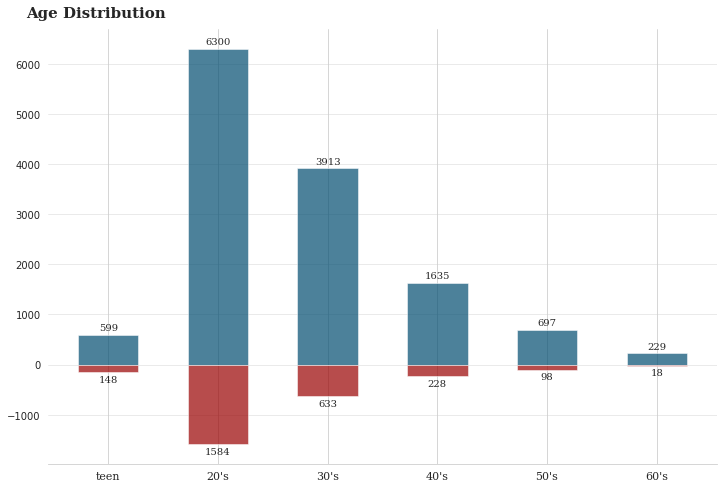

In [ ]:
#@title
agelabel = ['teen', "20's", "30's", "40's", "50's", "60's>"] ## 카테고리를 string으로 바꿀수있다.
data_copy['Age_cut'] = pd.cut(data_copy.Age, bins=np.linspace(10,70, num=7), labels=agelabel)
## pd.cut을 사용해 나이 카테고리를 생성
data_ag = data_copy.groupby('Age_cut')['GenderSelect'].value_counts().unstack()
male = data_ag['Male']
female = -data_ag['Female']
## barplot으로 만들기위한 변수들

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(male.index, male, width=.55, linewidth=.7, color='#004c70', alpha=.7)
ax.bar(female.index, female, width=.55, linewidth=.7, color='#990000', alpha=.7)

for i in male.index:
  ax.annotate(male[i], xy=(i, male[i] + 130), va='center', ha='center', fontfamily='serif')
for i in female.index:
  ax.annotate(-female[i], xy=(i, female[i] - 150), va='center', ha='center', fontfamily='serif')

for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(male.index, fontfamily='serif', fontsize=11)
fig.text(0.1, 0.9, 'Age Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.5) ## 그리드 크기 바꾸기

# 대부분의 나라에서 Kaggle survey에 참여한 남녀 비율은 남자가 많다.

In [ ]:
############################################################################################################################################################

# **직업분포와 그에따른 시각화를 실시**

사용방법 : 직업별로 groupby를 사용한다.



1. 직업의 분포는 어떻게 되는가??
2. 직업별 나이 분포는 어떠한가??
3. 직업별 직종만족도는 어떠한가??
4. 직업별로 추천하는 프로그래밍 언어는 무엇인가??



[Text(0, 0, 'Data Scientist'),
 Text(0, 0, 'Software Developer/Software Engineer'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Data Analyst'),
 Text(0, 0, 'Scientist/Researcher'),
 Text(0, 0, 'Business Analyst'),
 Text(0, 0, 'Researcher'),
 Text(0, 0, 'Machine Learning Engineer'),
 Text(0, 0, 'Engineer'),
 Text(0, 0, 'Programmer'),
 Text(0, 0, 'Computer Scientist'),
 Text(0, 0, 'Statistician'),
 Text(0, 0, 'DBA/Database Engineer'),
 Text(0, 0, 'Predictive Modeler'),
 Text(0, 0, 'Data Miner'),
 Text(0, 0, 'Operations Research Practitioner')]

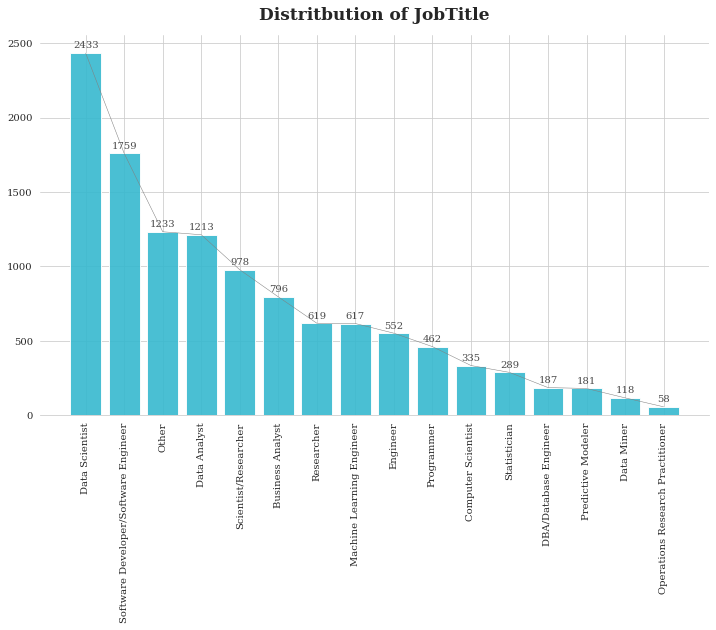

In [ ]:
#@title
fig, ax= plt.subplots(figsize=(12,7))
ax.bar(data_copy.CurrentJobTitleSelect.value_counts().index, data_copy.CurrentJobTitleSelect.value_counts(), color='#36B8CF', alpha=.9)
ax.plot(data_copy.CurrentJobTitleSelect.value_counts(), c='k', linewidth=.5, color='grey')

for i in ['top', 'left', 'right']:
  ax.spines[i].set_visible(False)

for i in data_copy.CurrentJobTitleSelect.value_counts().index:
  ax.annotate(data_copy.CurrentJobTitleSelect.value_counts()[i], xy=(i, data_copy.CurrentJobTitleSelect.value_counts()[i] + 50), va='center', ha='center', color='#4a4a4a', fontfamily='serif',
              fontweight='light')

ax.set_title('Distritbution of JobTitle', fontsize=17, fontweight='bold', fontfamily='serif', pad=15)
ax.set_yticklabels(range(0,2600,500),fontfamily='serif')
ax.set_xticklabels(data_copy.CurrentJobTitleSelect.value_counts().index, rotation=90, fontfamily='serif')

# 직업별 나이를 그룹화해 시각화 해보겠다.

> 나이대를 15-80세로 사용.

> mean값과 필요시 나이대를 범주화해 사용(agelabel 사용)





In [ ]:
#@title
data_2080 = data_copy[(data_copy.Age > 15)&(data_copy.Age < 80)]  ## data_2080 ==> 15세부터 80세까지 담은 변수이름 (치약 이름같다.)

Text(0.5, 1.0, 'Distribution by boxplot')

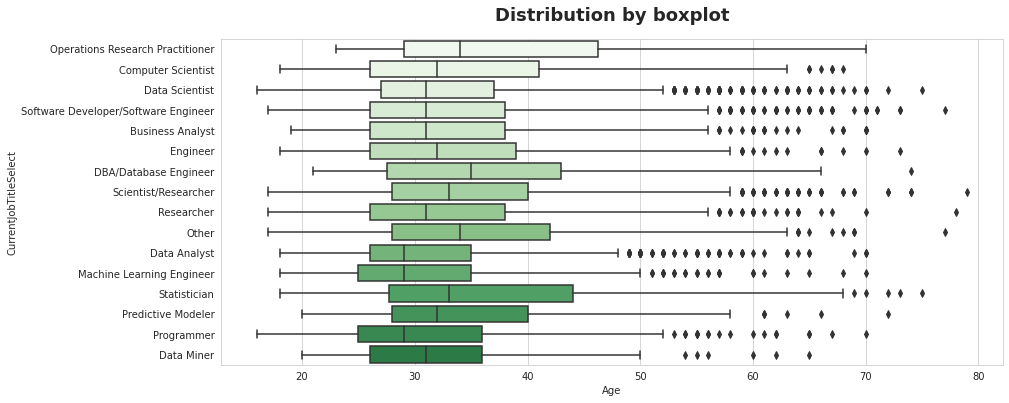

In [ ]:
#@title
plt.subplots(figsize=(14,6))
sns.boxplot(data=data_2080, y='CurrentJobTitleSelect', x='Age', palette=sns.color_palette('Greens', n_colors=20), )
plt.title('Distribution by boxplot', fontsize=18, fontweight='bold', pad=18)

박스 플롯으로 볼수있다시피

주로 20-50세의 나이대의 분포가 많다.

> **특히 직업별로 20대 후반 - 40대의 분포가 많다.**



'DataAnalyst', 'Machine Learning Engineear', 'Programmer'가 젊은 사람의 분포가 많다.


In [ ]:
g_2080_cac = data_2080.groupby('CurrentJobTitleSelect')['Age_cut'].value_counts().reset_index(name='Counts') ## g_2080_cac ==> 직업별 나이를 범주화한것과 그룹바이한 변수
g_2080_cac

,CurrentJobTitleSelect,Age_cut,Counts
0,Business Analyst,20's,358
1,Business Analyst,30's,268
2,Business Analyst,40's,91
3,Business Analyst,50's,40
4,Business Analyst,60's>,12
...,...,...,...
89,Statistician,30's,88
90,Statistician,40's,38
91,Statistician,50's,27
92,Statistician,60's>,15


In [ ]:
#@title
fig = px.sunburst(data_frame=g_2080_cac, values='Counts', path=['CurrentJobTitleSelect', 'Age_cut'], color='CurrentJobTitleSelect', color_discrete_sequence=px.colors.qualitative.Vivid)
fig.add_annotation(text="Job vs Age",
                  xref="paper", yref="paper",
                  x=-0.007, y=1.04, showarrow=False,
                  font={'size':14})
fig.add_annotation(text="Distribution by Plotly",
                  xref="paper", yref="paper",
                  x=-0.009, y=1.13, showarrow=False,
                  font={'size':22, 'family':'sans-Arial'})

In [ ]:
#@title
J_ac = data_2080[['CurrentJobTitleSelect','Age_cut']].sort_values(by='Age_cut') ## J_ac ==> 직업과 나이카테고리만 따온 변수

In [ ]:
#@title
px.histogram(data_frame=J_ac.dropna(), x='CurrentJobTitleSelect', color='Age_cut', color_discrete_sequence=px.colors.qualitative.Vivid)

10대, 60세 이상의 분포는 매우 적다.

대부분이 20-40대이다.

# 그렇다면 직업별로 직업만족도는 어떨까??

CurrentJobTitleSelect 컬럼과 TitleFit 컬럼을 groupby 시킨다.

[Text(0, 0, 'Business Analyst'),
 Text(0, 0, 'Computer Scientist'),
 Text(0, 0, 'DBA/Database Engineer'),
 Text(0, 0, 'Data Analyst'),
 Text(0, 0, 'Data Miner'),
 Text(0, 0, 'Data Scientist'),
 Text(0, 0, 'Engineer'),
 Text(0, 0, 'Machine Learning Engineer'),
 Text(0, 0, 'Operations Research Practitioner'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Predictive Modeler'),
 Text(0, 0, 'Programmer'),
 Text(0, 0, 'Researcher'),
 Text(0, 0, 'Scientist/Researcher'),
 Text(0, 0, 'Software Developer/Software Engineer'),
 Text(0, 0, 'Statistician')]

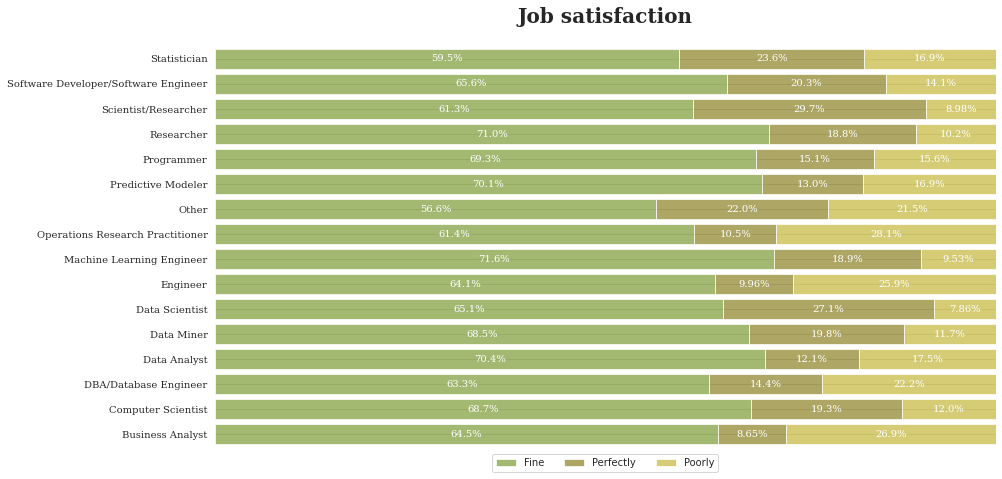

In [ ]:
#@title
data_jf = data_copy.groupby('CurrentJobTitleSelect')['TitleFit'].value_counts(normalize=True).unstack()[['Perfectly', 'Fine', 'Poorly']]
## data_jl ==> 'CurrentJobTitleSelect','TitleFit'를 그룹바이한 변수 (% 화까지 시켰다.분포-normalize)
fig, ax = plt.subplots(figsize=(14,8))
ax.barh(data_jf.index, data_jf['Fine'], color='#7D9C36', alpha=.7)
ax.barh(data_jf.index, data_jf['Perfectly'], color='#8A8024', left=data_jf['Fine'], alpha=.7)
ax.barh(data_jf.index, data_jf['Poorly'], color='#C4B73B', left=data_jf['Fine']+data_jf['Perfectly'], alpha=.7)

for x in ['top', 'bottom', 'left', 'right']:
  ax.spines[x].set_visible(False)

for i in data_jf['Fine'].index:
  ax.annotate(f"{data_jf['Fine'][i]*100:.3}%", xy=(data_jf['Fine'][i]/2, i), ha='center', va='center', color='w', fontweight='light', fontfamily='serif')

for i in data_jf['Perfectly'].index:
  ax.annotate(f"{data_jf['Perfectly'][i]*100:.3}%", xy=(data_jf['Fine'][i] + data_jf['Perfectly'][i]/2, i), ha='center', va='center', color='w', fontweight='light', fontfamily='serif')

for i in data_jf['Poorly'].index:
  ax.annotate(f"{data_jf['Poorly'][i]*100:.3}%", xy=(data_jf['Fine'][i] + data_jf['Perfectly'][i] + data_jf['Poorly'][i]/2, i), ha='center', va='center', color='w', fontweight='light', fontfamily='serif')

ax.set_xlim([0,1])
ax.set_xticks([])
legend_text = {'Fine':'fine', 'Perfectly':'perfectly', 'Poorly':'poorly'}
ax.legend(legend_text, loc='lower center', ncol=3, bbox_to_anchor=(.5, -0.03))
ax.set_title('Job satisfaction', fontsize=20, fontfamily='serif', fontweight='bold')
ax.set_yticklabels(data_jf.index, fontfamily='serif')

# 직업 만족도 시각화 완료

각 직업 만족도가 괜찮다는(Fine)이 과반수를 차지한다.

하지만 Operations Research Practitioner, Engineer, Business Analyst는 불만족도가 높은편이다.

> 이직률이 높나??



# 직업별 추천하는 프로그래밍 언어

사용한 시각화도구 ==> px.histogram()

In [ ]:
data_1 = data_copy[['CurrentJobTitleSelect', 'LanguageRecommendationSelect']]
data_1
## data_1 ==> job과 language 데이터를 저장한 변수

,CurrentJobTitleSelect,LanguageRecommendationSelect
0,DBA/Database Engineer,F#
1,NaN,Python
2,NaN,R
3,Operations Research Practitioner,Python
4,Computer Scientist,Python
...,...,...
16711,NaN,NaN
16712,Programmer,Python
16713,NaN,NaN
16714,NaN,NaN


In [ ]:
#@title
px.histogram(data_frame=data_1.dropna(), x='CurrentJobTitleSelect', color='LanguageRecommendationSelect', template='ggplot2')
## data_1.dropna()를 했기 때문에 데이터 자체 숫자는 크게 줄었다.(한가지라도 Null값이면 drop이기 때문에)

In [ ]:
data_cl1 = data_1.groupby('CurrentJobTitleSelect')['LanguageRecommendationSelect'].value_counts().reset_index(name='count')
data_cl1
## data_cl1 ==> 직업별 추천하는 프로그래밍 언어를 value_counts()하고 reset_index()를 했다.
## ==> px.sunburst()를 하기위함

,CurrentJobTitleSelect,LanguageRecommendationSelect,count
0,Business Analyst,Python,272
1,Business Analyst,R,189
2,Business Analyst,SQL,51
3,Business Analyst,C/C++/C#,8
4,Business Analyst,SAS,8
...,...,...,...
158,Statistician,C/C++/C#,3
159,Statistician,Scala,2
160,Statistician,F#,1
161,Statistician,Java,1


In [ ]:
#@title
fig = px.sunburst(data_cl1, path=['CurrentJobTitleSelect', 'LanguageRecommendationSelect'], values='count')
fig.update_layout()

위의 그래프(히스토그램과 sunburst)를 봤을때 각 직종별 추천하는 프로그래밍언어는 'Python'이 많다.


어떻게 보면 캐글이니까 그럴수도...
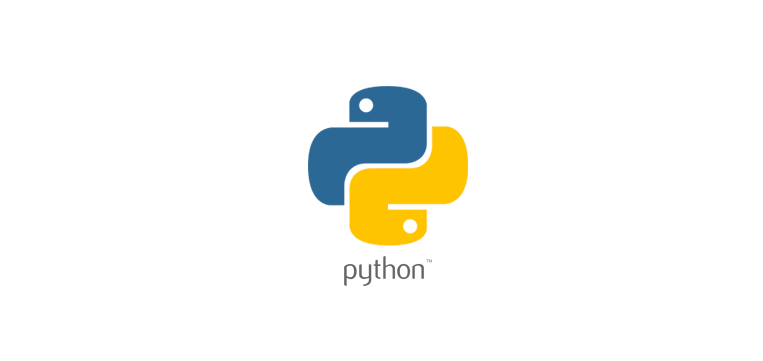

In [ ]:
#@title
data_je_m = data_copy.groupby(['CurrentJobTitleSelect','FormalEducation'])['MajorSelect'].value_counts().reset_index(name='counts')
fig = px.treemap(data_frame=data_je_m, path=['CurrentJobTitleSelect', 'FormalEducation', 'MajorSelect'], values='counts', color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(title='Job vs FormalEdu',font={'size':20, 'family':'sans-serif', 'color':'#4a4a4a'} )
fig.add_annotation(text="And Major",
                  xref="paper", yref="paper",
                  x=-0.007, y=1.06, showarrow=False,
                  font={'size':20, 'family':'serif', 'color':'#4a4a4a'})

# 대부분의 직업이 석사(Master's degree)가 과반이다.
(2순위는 학사(Bachelor's))

그리고 각 직업마다 무슨과가 많은지도 시각화 완료!!

Text(0.5, 42.0, '')

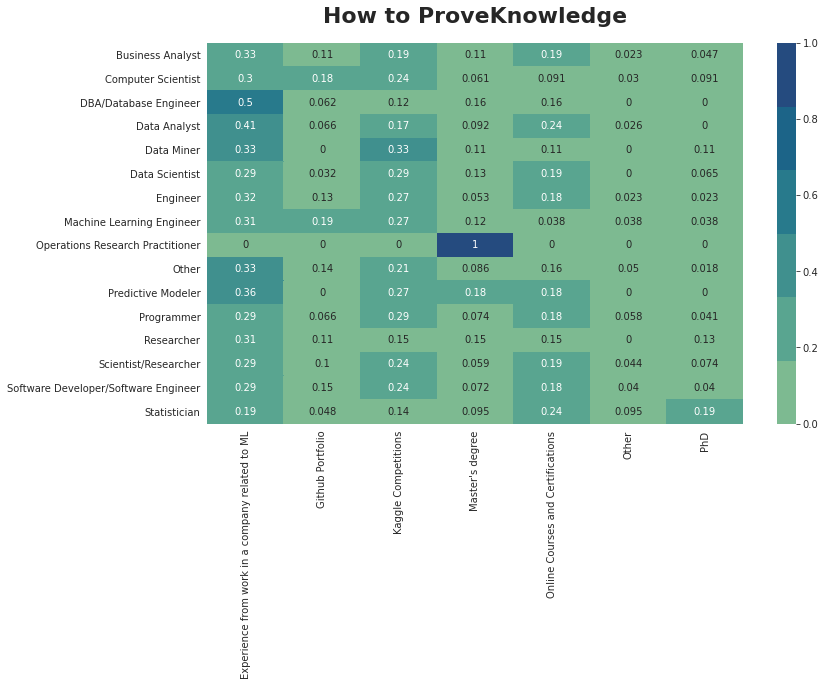

In [ ]:
#@title
data_job_proven = data_copy.groupby('CurrentJobTitleSelect')['ProveKnowledgeSelect'].value_counts(normalize=True).unstack().fillna(0)  ## 직업별로 어떻게 회사에 지식을 증명하느냐하는 통계

plt.figure(figsize=(12,7))
sns.heatmap(data_job_proven, annot=True, cmap=sns.color_palette('crest'))
plt.title('How to ProveKnowledge', fontsize=22, pad=20, fontweight='bold')
plt.ylabel('')
plt.xlabel('')

#  **ㆍ 취직하거나 이직할때 어떤식으로 지식을 증명하는가에 대한 질문(직업별)**



*   대부분의 직업이 전 회사에서 일한(ML을 활용한) 경력으로 어필. ==> 이 바닥은 경력이 중요
*   흥미로운 결과는 kaggle competitions ==>

 kaggle ranking은 중요하지않지만 자신을 증명할만한것 역시 kaggle ranking 만한게 없다는 결과

*  온라인 교육(Courcera, Edwith, ...)등의 증명서도 주요한 증거물이다.




In [ ]:
############################################################################################################################################################

# 배우기 유용한 플랫폼 value_counts() 를 시각화

In [ ]:
#@title
learning_platform_text = [x for x in data_copy.columns if x.find('LearningPlatform') != -1]  ## 제목 뽑아내기

In [ ]:
#@title
learning_platform_text.remove('LearningPlatformSelect')

In [ ]:
#@title
## 이 사용법 외우자!!! 유용할 듯
learning_platform = {}   ## 딕셔너리를 사용해 각 제목별로 값을 담는다.
for i in learning_platform_text:
  a = data_copy[i].value_counts()
  learning_platform[i[len('LearningPlatform'):]] = a

learning_platform = pd.DataFrame(learning_platform).T

In [ ]:
learning_platform['Sum'] = learning_platform.sum(axis=1) ## 열 합계
learning_platform = learning_platform.sort_values(by='Sum', ascending=False)
learning_platform

,Not Useful,Somewhat useful,Very useful,Sum
UsefulnessKaggle,56,2451,4076,6583
UsefulnessCourses,47,1750,4195,5992
UsefulnessSO,64,2044,3532,5640
UsefulnessYouTube,104,2605,2520,5229
UsefulnessProjects,39,1185,3570,4794
UsefulnessBlogs,45,2406,2314,4765
UsefulnessTextbook,69,1796,2316,4181
UsefulnessCollege,101,1405,1853,3359
UsefulnessArxiv,37,1038,1316,2391
UsefulnessDocumentation,42,1067,1212,2321


In [ ]:
#@title
learning_platform_sum = learning_platform.sum(axis=0).drop(['Sum']) ## 행 합계
learning_platform_sum

Not Useful          1052
Somewhat useful    23130
Very useful        31021
dtype: int64

Text(0.5, 1.0, 'Pie Plot')

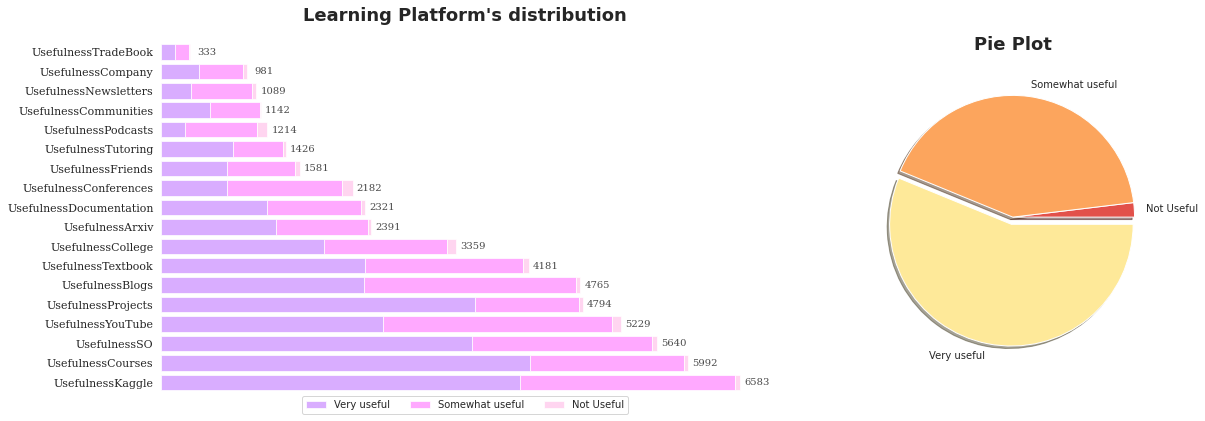

In [ ]:
#@title
gs = GridSpec(nrows=1, ncols=2, width_ratios=[80,40], height_ratios=[10])
fig = plt.subplots(figsize=(18,7))
ax = plt.subplot(gs[0])
ax.barh(learning_platform.index, learning_platform['Very useful'], color='#C98AFF', alpha=.7)
ax.barh(learning_platform.index, learning_platform['Somewhat useful'], left=learning_platform['Very useful'], color='#FF85FF', alpha=.7)
ax.barh(learning_platform.index, learning_platform['Not Useful'], left=learning_platform['Very useful'] + learning_platform['Somewhat useful'], color='#FFC4EB', alpha=.7)

for i in learning_platform.index:
  ax.annotate(learning_platform['Sum'][i], xy=(learning_platform['Sum'][i] + 190, i), color='#4a4a4a',va='center', ha='center', fontfamily='serif', fontweight='light')

for i in ['top', 'left', 'right', 'bottom']:
  ax.spines[i].set_visible(False)

ax.set_xticks([])
ax.set_yticklabels(learning_platform.index, fontfamily='serif', fontsize=11)
ax.set_title("Learning Platform's distribution", fontweight='bold', fontsize=18)

legend_text_lp = {'Very useful':'Very useful', 'Somewhat useful':'Somewhat useful', 'Not Useful':'Not Useful'}
ax.legend(legend_text_lp, loc='lower center', ncol=3, bbox_to_anchor=(.5, -0.03))
ax.grid(False)  ## grid 숨기기

ax1 = plt.subplot(gs[1])
ax1.pie(learning_platform_sum, labels=learning_platform_sum.index, shadow=True, startangle=0, explode=[0, 0, 0.06], colors=sns.color_palette('Spectral'))
ax1.set_title('Pie Plot', fontsize=18, fontweight='bold', pad=15)

# 그렇다면 데이터사이언스의 일에있어서 중요한 스킬을 알아봄

'JobSkillImportance' 을 이용.

In [ ]:
#@title
Job_importance_text = [i for i in data_copy.columns if i.find('JobSkillImportance') != -1]  ## 'JobSkillImportance'를 포함하는 컬럼들의 이름 저장
Job_importance_text
del Job_importance_text[10:]  ## 불필요한 컬럼제목 지우기

In [ ]:
Job_importance = {}
for i in Job_importance_text:
  a = data_copy[i].value_counts()
  Job_importance[i[len('JobSkillImportance'):]] = a

Job_importance = pd.DataFrame(Job_importance)  ## 데이터프레임으로 집어넣기
Job_importance

,BigData,Degree,Stats,EnterpriseTools,Python,R,SQL,KaggleRanking,MOOC,Visualizations
Necessary,1503,1094,2035,535,2604,1636,1690,460,411,1761
Nice to have,2271,2338,1812,2087,1319,2027,1914,2621,2326,1898
Unnecessary,182,477,113,1072,108,281,288,789,1095,208


Text(0.5, 0.98, 'Job Skills Importance')

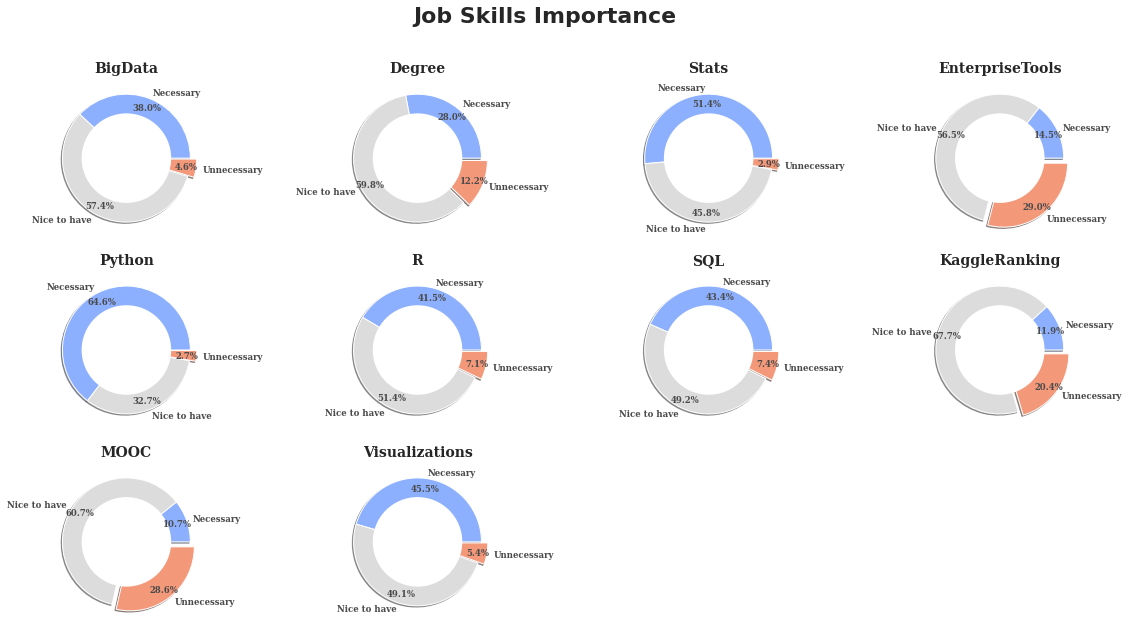

In [ ]:
#@title
fig = plt.subplots(figsize=(20,10))
gs = GridSpec(nrows=3, ncols=4, width_ratios=[10,10,10,10], height_ratios=[8,8,8])

for i,j in enumerate(Job_importance.columns):
  ax = plt.subplot(gs[i])
  ax.pie(x=Job_importance[j], labels=Job_importance[j].index, autopct='%1.1f%%', shadow=True, pctdistance=.85, textprops={'color':'#4a4a4a', 'fontfamily':'serif', 'weight':'bold', 'size':8.5},
         colors=sns.color_palette('coolwarm', 3), explode=[0,0,0.1])
  ax.set_title(f'{j}', fontsize=14, fontweight='bold', fontfamily='serif')
  centre_circle = plt.Circle((0,0), 0.70, color='black', fc='white', linewidth=0)
  ax.add_artist(centre_circle)

plt.suptitle('Job Skills Importance', fontsize=22, fontweight='bold', fontfamily='sans-serif')

Text(0.5, 0.98, 'Job skills importance')

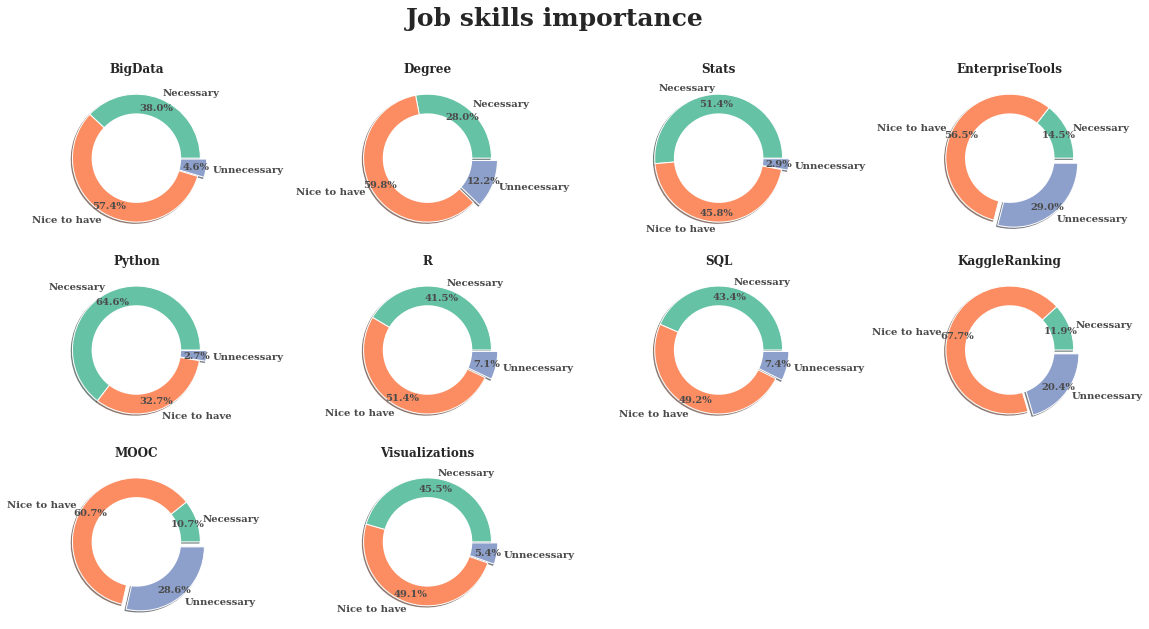

In [ ]:
#@title
fig = plt.subplots(figsize=(20,10))
gs = GridSpec(nrows=3, ncols=4, width_ratios=[10,10,10,10], height_ratios=[8,8,8])

for i,j in enumerate(Job_importance.columns):
  ax = plt.subplot(gs[i])
  ax.pie(data=Job_importance, x=Job_importance[j], labels=Job_importance[j].index, autopct='%1.1f%%', shadow=True, pctdistance=.85, textprops={'color':'#4a4a4a', 'fontfamily':'serif', 'weight':'bold'},
         colors=sns.color_palette('Set2'), explode=[0,0,0.1])                                                       ## pctdistance ==> pct가 원으로부터 얼마나 멀어질지 설정 (default=.6)
  ax.set_title(f'{j}', fontsize=12, fontfamily='serif', fontweight='bold')
  centre_circle = plt.Circle((0,0), 0.70, color='black', fc='white', linewidth=0)
  ax.add_artist(centre_circle) ## 도넛 모형으로 보이게하는 기능

plt.suptitle('Job skills importance', fontsize=25, fontweight='bold', fontfamily='serif')

In [ ]:
Job_importance_T = {}
for i in Job_importance_text:
  a = data_copy[i].value_counts(normalize=True)   ## 정규화 한것 합이 1
  Job_importance_T[i] = a

Job_importance_T = pd.DataFrame(Job_importance_T).T
Job_importance_T  ## Job_importance를 정규화 한것 합이 1

,Necessary,Nice to have,Unnecessary
JobSkillImportanceBigData,0.379929,0.574065,0.046006
JobSkillImportanceDegree,0.279867,0.598107,0.122026
JobSkillImportanceStats,0.513889,0.457576,0.028535
JobSkillImportanceEnterpriseTools,0.144829,0.564970,0.290200
JobSkillImportancePython,0.645994,0.327214,0.026792
JobSkillImportanceR,0.414807,0.513945,0.071247
JobSkillImportanceSQL,0.434224,0.491778,0.073998
JobSkillImportanceKaggleRanking,0.118863,0.677261,0.203876
JobSkillImportanceMOOC,0.107255,0.606994,0.285752
JobSkillImportanceVisualizations,0.455392,0.490820,0.053788


Text(0.5, 1.0, 'Distribution by barh plot')

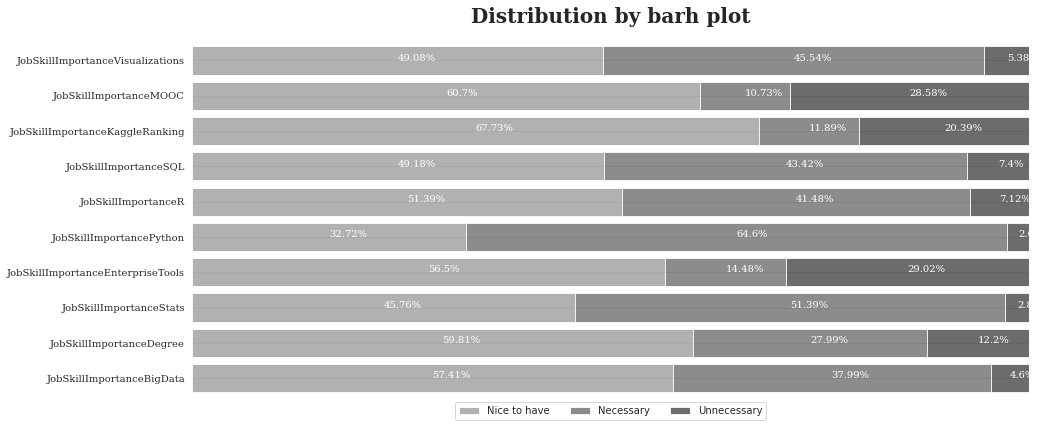

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(15,7))
ax.barh(Job_importance_T.index, Job_importance_T['Nice to have'], color='#9E9E9E', alpha=.8)
ax.barh(Job_importance_T.index, Job_importance_T['Necessary'], left=Job_importance_T['Nice to have'], color='#6F6F6F', alpha=.8)
ax.barh(Job_importance_T.index, Job_importance_T['Unnecessary'], left=Job_importance_T['Nice to have'] + Job_importance_T['Necessary'], color='#474747', alpha=.8)

ax.set_xlim([0,1])
ax.set_xticks([])

for i in Job_importance_T.index:
  ax.annotate(f"{round(Job_importance_T['Nice to have'][i]*100, 2)}%", xy=(Job_importance_T['Nice to have'][i]/2, i), fontweight='light', fontfamily='serif', color='w')

for i in Job_importance_T.index:
  ax.annotate(f"{round(Job_importance_T['Necessary'][i]*100, 2)}%", xy=(Job_importance_T['Nice to have'][i] + Job_importance_T['Necessary'][i]/2, i), fontweight='light', fontfamily='serif', color='w')

for i in Job_importance_T.index:
  ax.annotate(f"{round(Job_importance_T['Unnecessary'][i]*100, 2)}%", xy=(Job_importance_T['Nice to have'][i] + Job_importance_T['Necessary'][i] + Job_importance_T['Unnecessary'][i]/2, i), fontweight='light', fontfamily='serif', color='w')

for s in ['top','bottom', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_yticklabels(Job_importance_T.index, fontfamily='serif')
legend_text_Ji = {'Nice to have':'Nice to have', 'Necessary':'Necessary', 'Unnecessary':'Unnecessary'}
ax.legend(legend_text_Ji, loc='lower center', ncol=3, bbox_to_anchor=(.5, -0.04))
ax.set_title('Distribution by barh plot', fontsize=20, fontweight='bold', fontfamily='serif')

# **Job Skill Important의 결과**




> 대부분 스킬들은 있으면 좋다는 반응이 대부분이다.(Python 빼고)

> 'Python'은 필수요소라는 반응이 과반수가 넘는다.

> 'R', 'SQL', 'Visualization'은 필수요소에 가깝다.

> 'MOOC', 'EnterpriseTools', 'Kaggle Ranking'은 필요없다는 의견이 꽤 많다.

> 'Degree'도 필요없다는 의견이 은근히 높다.




**결과 도출 ==>**

내가 준비해야하는것(모든 스킬이 다 있으면 좋지만...)

1.   파이썬은 꼭 필요한 스킬이다 (kaggle에서 survey실시했기 때문일수도...)
2.   'R', 'SQL'은 왠만하면 배워야한다.
3.   'MOOC', 'EnterpriseTools', 'Kaggle Ranking'은 필요없는건 아니지만 없어도 된다.








In [ ]:
data_copy.iloc[:,30:130]

,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceMOOC,JobSkillImportanceVisualizations,JobSkillImportanceOtherSelect1,JobSkillImportanceOtherSelect2,JobSkillImportanceOtherSelect3,CoursePlatformSelect,HardwarePersonalProjectsSelect,TimeSpentStudying,ProveKnowledgeSelect,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,FirstTrainingSelect,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,MLSkillsSelect,MLTechniquesSelect,ParentsEducation,EmployerIndustry,EmployerSize,...,WorkToolsFrequencyIBMCognos,WorkToolsFrequencyIBMSPSSModeler,WorkToolsFrequencyIBMSPSSStatistics,WorkToolsFrequencyIBMWatson,WorkToolsFrequencyImpala,WorkToolsFrequencyJava,WorkToolsFrequencyJulia,WorkToolsFrequencyJupyter,WorkToolsFrequencyKNIMECommercial,WorkToolsFrequencyKNIMEFree,WorkToolsFrequencyMathematica,WorkToolsFrequencyMATLAB,WorkToolsFrequencyAzure,WorkToolsFrequencyExcel,WorkToolsFrequencyMicrosoftRServer,WorkToolsFrequencyMicrosoftSQL,WorkToolsFrequencyMinitab,WorkToolsFrequencyNoSQL,WorkToolsFrequencyOracle,WorkToolsFrequencyOrange,WorkToolsFrequencyPerl,WorkToolsFrequencyPython,WorkToolsFrequencyQlik,WorkToolsFrequencyR,WorkToolsFrequencyRapidMinerCommercial,WorkToolsFrequencyRapidMinerFree,WorkToolsFrequencySalfrod,WorkToolsFrequencySAPBusinessObjects,WorkToolsFrequencySASBase,WorkToolsFrequencySASEnterprise,WorkToolsFrequencySASJMP,WorkToolsFrequencySpark,WorkToolsFrequencySQL,WorkToolsFrequencyStan,WorkToolsFrequencyStatistica,WorkToolsFrequencyTableau,WorkToolsFrequencyTensorFlow,WorkToolsFrequencyTIBCO,WorkToolsFrequencyUnix,WorkToolsFrequencySelect1
0,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Bachelor's degree,Management information systems,More than 10 years,"Predictive Modeler,Programmer,Researcher",University courses,0.0,0.0,100.0,0.0,0.0,0.0,"Computer Vision,Natural Language Processing,Su...","Evolutionary Approaches,Neural Networks - GANs...",A doctoral degree,Internet-based,100 to 499 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes,NaN,Most of the time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,Unnecessary,NaN,Necessary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 - 10 hours,Master's degree,Yes,Master's degree,Computer Science,Less than a year,Software Developer/Software Engineer,University courses,10.0,30.0,0.0,30.0,30.0,0.0,"Computer Vision,Supervised Machine Learning (T...","Bayesian Techniques,Decision Trees - Gradient ...",A bachelor's degree,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,NaN,Necessary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Coursera,edX",Basic laptop (Macbook),2 - 10 hours,Github Portfolio,Yes,Master's degree,Engineering (non-computer focused),3 to 5 years,"Data Scientist,Machine Learning Engineer",University courses,20.0,50.0,0.0,30.0,0.0,0.0,"Adversarial Learning,Computer Vision,Natural L...","Decision Trees - Random Forests,Ensemble Metho...",A bachelor's degree,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
## 시각화해서 답을 찾고 싶은 데이터(columns)들

In [ ]:
data_copy.ProveKnowledgeSelect.value_counts()

Experience from work in a company related to ML    1300
Kaggle Competitions                                 857
Online Courses and Certifications                   592
Github Portfolio                                    568
Master's degree                                     454
PhD                                                 240
Other                                               150
Name: ProveKnowledgeSelect, dtype: int64

In [ ]:
data_copy.LearningDataScienceTime.value_counts()  ## 직업이랑 묶고

< 1 year       2093
1-2 years      1566
3-5 years       540
5-10 years      106
15+ years        30
10-15 years      14
Name: LearningDataScienceTime, dtype: int64

In [ ]:
data_copy.FormalEducation.value_counts()  ## 직업과 나라로도 묶고

Master's degree                                                      6273
Bachelor's degree                                                    4811
Doctoral degree                                                      2347
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [ ]:
data_copy.MajorSelect.value_counts()  ## 학력이랑 묶고

Computer Science                                                4397
Mathematics or statistics                                       2220
Engineering (non-computer focused)                              1339
Electrical Engineering                                          1303
Other                                                            848
Physics                                                          830
Information technology, networking, or system administration     693
A social science                                                 531
Biology                                                          274
Management information systems                                   237
A humanities discipline                                          198
A health science                                                 152
Psychology                                                       137
I never declared a major                                          65
Fine arts or performing arts      

In [ ]:
data.head().iloc[:,190:]

,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Often,Often,Often,Often,Often,NaN,100% of projects,Entirely internal,Standalone Team,Electricity data sets from government and states,"Everything is custom, there is never a tool th...","Column-oriented relational (e.g. KDB/MariaDB),...","Company Developed Platform,Email",NaN,Generic cloud file sharing software (Dropbox/B...,NaN,"250,000",USD,Has increased 20% or more,10 - Highly Satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Most of the time,NaN,Sometimes,NaN,NaN,NaN,10-25% of projects,Approximately half internal and half external,Business Department,NaN,NaN,Flat files not in a database or cache (e.g. CS...,Company Developed Platform,NaN,Git,Rarely,NaN,NaN,I do not want to share information about my sa...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#@title
data_nn_sal = data_copy[(data_copy.CompensationAmount.notnull())&(data_copy.CompensationAmount != '0')]  ## 'CompensationAmount'가 notnull인 변수

In [ ]:
#@title
data_nn_sal['CompensationAmount'] = data_nn_sal.CompensationAmount.apply(lambda x: x.replace(',', ''))  ## 숫자중에 ,(콤마) 없애기
data_nn_sal['CompensationAmount'] = data_nn_sal.CompensationAmount.apply(lambda x: x.replace('-', ''))

In [ ]:
#@title
data_nn_sal['CompensationAmount'].apply(lambda x: float(x))  ## string을 float으로 바꾸려고했는데 err가 뜬다. ==> pd.to_numeric을 사용하자. 주의!! 강제성이 있어서 Null값이 생긼수도있음

ValueError: ignored

In [ ]:
#@title
data_nn_sal['CompensationAmount'] = pd.to_numeric(data_nn_sal['CompensationAmount'])
data_nn_sal.dropna(inplace=True, subset=['CompensationAmount'])  ## subset을 지정해줘야 dropna를 할수있음

In [ ]:
#@title
data_nn_sal['CompensationAmount'] = data_nn_sal['CompensationAmount'].astype(int)

In [ ]:
############################################################################# salary 변화 완료 ###############################################################################